In [12]:
from keras.layers import Input,Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model 
from keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy as np 

In [13]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape);print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
input_imgs = Input(shape=(28,28,1)) # 영상크기 28*28 
img = Conv2D(16,(3,3), activation='relu',padding='same')(input_imgs) 
img = MaxPooling2D((2,2), padding='same')(img) #영상크기  14*14
img = Conv2D(8,(3,3), activation='relu',padding='same')(img)
img = MaxPooling2D((2,2), padding='same')(img) #영상크기 7*7
img = Conv2D(8,(3,3), activation='relu',padding='same')(img)

encoder_img = MaxPooling2D((2,2), padding='same')(img) #영상크기 4*4

img = Conv2D(8,(3,3), activation='relu',padding='same')(encoder_img)
img = UpSampling2D((2,2))(img) #영상크기 7*7
img = Conv2D(8,(3,3), activation='relu',padding='same')(img)
img = UpSampling2D((2,2))(img) #영상크기 14*14
img = Conv2D(16,(3,3), activation='relu')(img)
img = UpSampling2D((2,2))(img) #영상크기 28*28
decoder_img = Conv2D(1,(3,3), activation ='sigmoid', padding ='same')(img)

enacoder = Model(input_imgs, encoder_img)
autoencoder = Model(input_imgs, decoder_img)

In [19]:
autoencoder.compile(optimizer ='adadelta', loss ='binary_crossentropy',
                  metrics=['accuracy'])

In [21]:
n=50 
hist=autoencoder.fit(x_train, x_train, epochs = n, batch_size=256, shuffle =True,
                    validation_data=(x_test,x_test))
loss=hist.history['loss']
accuracy=hist.history['accuracy']
print('training Loss=',loss[n-1], 'training Accuracy=', accuracy[n-1])


Epoch 1/50
235/235 [==============================] - 26s 112ms/step - loss: 0.6934 - accuracy: 0.3667 - val_loss: 0.6930 - val_accuracy: 0.4367
Epoch 2/50
235/235 [==============================] - 25s 108ms/step - loss: 0.6927 - accuracy: 0.5061 - val_loss: 0.6923 - val_accuracy: 0.5729
Epoch 3/50
235/235 [==============================] - 26s 111ms/step - loss: 0.6919 - accuracy: 0.6331 - val_loss: 0.6915 - val_accuracy: 0.6857
Epoch 4/50
235/235 [==============================] - 26s 109ms/step - loss: 0.6910 - accuracy: 0.7258 - val_loss: 0.6906 - val_accuracy: 0.7569
Epoch 5/50
235/235 [==============================] - 26s 109ms/step - loss: 0.6901 - accuracy: 0.7775 - val_loss: 0.6895 - val_accuracy: 0.7906
Epoch 6/50
235/235 [==============================] - 26s 109ms/step - loss: 0.6889 - accuracy: 0.7991 - val_loss: 0.6882 - val_accuracy: 0.8027
Epoch 7/50
235/235 [==============================] - 26s 109ms/step - loss: 0.6874 - accuracy: 0.8064 - val_loss: 0.6866 - val_ac

In [26]:
encoded_imgs = enacoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
print(encoded_imgs.shape)

(10000, 4, 4, 8)


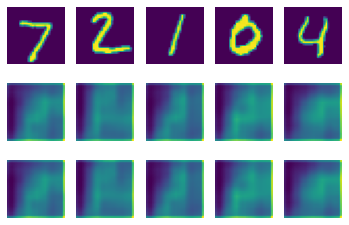

In [27]:
np=5  # 몇 개의 숫자를 나타낼 것인지
plt.figure(2)
for i in range(np):
    ax = plt.subplot(3, np, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis('off')
    
    # 재구성된 데이터
    ax = plt.subplot(3, np, i + 1 + np)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis('off')
    
    ax = plt.subplot(3, np, i + 1+2*np)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis('off')
       
plt.show()